In [1]:
%run my_split_func2.ipynb
# Function = my_train_test_split(X, y)
%run plot_features_importance.ipynb
#Function = plot_features_importance(model)

In [32]:
!pwd
updated_df_with_times.csv

/Users/Lisa/_Sports_Activity_Capstone/feature_engineering


In [33]:
df2 = pd.read_csv('/Users/Lisa/_Sports_Activity_Capstone/updated_df_with_times.csv')

### Establish each body part dataframe for modeling

In [3]:
# This will drop Arms & Torso columns
legs = df.drop(['LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro',
                'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 'RA_xacc', 
                'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 
                'RA_ymag', 'RA_zmag', 'T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro',
                'T_zgyro', 'T_xmag', 'T_ymag', 'T_zmag'], axis=1)

In [4]:
# This will drop Legs & Torso
arms = df.drop(['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro', 
                'T_xmag', 'T_ymag', 'T_zmag', 'RL_xacc', 'RL_yacc', 'RL_zacc', 
                'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
                'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 
                'LL_xmag', 'LL_ymag', 'LL_zmag'], axis=1)

In [5]:
# This will drop arms & Legs
torso = df.drop(['RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 
                 'RA_xmag', 'RA_ymag', 'RA_zmag', 'LA_xacc', 'LA_yacc', 'LA_zacc', 
                 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
                 'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 
                 'RL_xmag', 'RL_ymag', 'RL_zmag', 'LL_xacc', 'LL_yacc', 'LL_zacc', 
                 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag'], axis=1)

In [6]:
legs

,person,activity_number,time,RL_xacc,RL_yacc,RL_zacc,RL_xgyro,RL_ygyro,RL_zgyro,RL_xmag,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,1,1,1.0,-3.535547,9.060013,-0.936655,-0.000232,0.008071,-0.005528,0.731359,...,-0.039000,-2.809729,-9.083978,2.626679,-0.005303,0.001935,-0.003317,0.740718,0.302500,-0.056373
1,1,1,2.0,-3.536972,9.058269,-0.923780,0.000177,0.007755,-0.005822,0.730031,...,-0.039301,-2.796961,-9.086883,2.631203,-0.005166,0.001797,-0.003232,0.739271,0.302034,-0.056720
2,1,1,3.0,-3.533532,9.060466,-0.908436,-0.000511,0.007990,-0.006153,0.729461,...,-0.040353,-2.789059,-9.090416,2.629437,-0.005496,0.001615,-0.003151,0.738746,0.302321,-0.056930
3,1,1,4.0,-3.531922,9.066069,-0.897868,0.000019,0.008349,-0.005853,0.729108,...,-0.041032,-2.780424,-9.095914,2.624423,-0.005100,0.001762,-0.002923,0.738183,0.302999,-0.057246
4,1,1,5.0,-3.532072,9.061541,-0.901432,-0.000007,0.007939,-0.006059,0.729076,...,-0.041533,-2.773596,-9.101732,2.611724,-0.005464,0.002143,-0.003231,0.737841,0.304157,-0.056492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,8,19,1.0,-10.069417,0.768414,-0.775780,0.037006,0.006736,0.029942,0.685458,...,0.006729,-10.063521,-0.619705,-1.140875,0.011341,-0.023558,-0.000605,0.642958,0.236710,0.255006
756,8,19,2.0,-10.108653,0.949456,-0.535078,0.037611,-0.002659,0.020285,0.740932,...,-0.106791,-10.025448,-1.088265,-1.242026,0.004165,0.019041,-0.021512,0.634369,0.256596,0.364230
757,8,19,3.0,-10.110552,0.679101,-0.728131,0.029897,0.014308,0.000278,0.736458,...,-0.009925,-10.018549,-0.919432,-1.106094,0.002843,-0.010134,-0.030319,0.660857,0.400970,0.208620
758,8,19,4.0,-9.980584,1.123019,-0.785319,0.063292,-0.007249,0.035794,0.725364,...,0.183034,-9.946248,-0.881898,-0.750747,0.065316,0.019333,0.006914,0.685286,-0.156595,0.134312


In [7]:
arms

,person,activity_number,time,RA_xacc,RA_yacc,RA_zacc,RA_xgyro,RA_ygyro,RA_zgyro,RA_xmag,...,RA_zmag,LA_xacc,LA_yacc,LA_zacc,LA_xgyro,LA_ygyro,LA_zgyro,LA_xmag,LA_ymag,LA_zmag
0,1,1,1.0,0.557273,5.898317,7.798223,0.009517,-0.003628,-0.001741,-0.563565,...,-0.202354,3.352871,-8.481380,3.654443,-0.003462,-0.001022,-0.006535,-0.648709,0.338936,0.076111
1,1,1,2.0,0.408740,6.095126,7.655033,0.009564,-0.004017,-0.001352,-0.555162,...,-0.192863,3.319830,-8.545502,3.538147,-0.002594,-0.001811,-0.006447,-0.647243,0.337923,0.079152
2,1,1,3.0,0.312816,6.190084,7.583673,0.009191,-0.004679,-0.001796,-0.549699,...,-0.189006,3.284215,-8.565921,3.518487,-0.001990,-0.002160,-0.006503,-0.646768,0.338139,0.077506
3,1,1,4.0,0.180493,6.338310,7.464882,0.008808,-0.004834,-0.001488,-0.541302,...,-0.181592,3.301706,-8.522963,3.611248,-0.002511,-0.002108,-0.006246,-0.648475,0.335099,0.070405
4,1,1,5.0,0.117713,6.429433,7.386833,0.009118,-0.004528,-0.001627,-0.537480,...,-0.175996,3.338012,-8.520019,3.585151,-0.002302,-0.002080,-0.007099,-0.651519,0.329680,0.067528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,8,19,1.0,7.195748,3.145193,3.708954,0.169829,-0.440183,-0.055140,-0.261837,...,-0.194761,6.644816,-4.560973,3.555908,-0.070257,-0.322703,0.196989,-0.191593,0.135017,-0.455834
756,8,19,2.0,6.653864,3.707992,2.959736,0.005180,-0.326136,-0.071856,-0.217667,...,-0.069998,6.041065,-4.317838,3.166671,-0.061117,-0.403023,0.181312,-0.200031,0.075690,-0.472615
757,8,19,3.0,6.300779,4.566586,2.752667,0.032615,-0.403825,-0.017640,-0.071046,...,-0.209954,5.725513,-5.349552,2.680341,0.004965,-0.452045,0.175422,-0.042928,0.199028,-0.405811
758,8,19,4.0,5.699967,3.986630,2.660734,0.075436,-0.458750,-0.125883,-0.281245,...,-0.162967,6.006369,-4.270566,2.910505,0.037249,-0.284735,-0.022040,-0.333591,0.181358,-0.188207


In [8]:
torso

,person,activity_number,time,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag
0,1,1,1.0,7.930544,1.169095,5.654536,0.002940,0.020659,-0.003139,-0.793103,-0.072006,0.131325
1,1,1,2.0,7.883222,1.271661,5.700059,0.002205,0.020347,-0.003381,-0.792056,-0.076063,0.126504
2,1,1,3.0,7.825126,1.340783,5.766320,0.002818,0.019563,-0.002821,-0.792395,-0.076676,0.119918
3,1,1,4.0,7.838236,1.442390,5.724239,0.003405,0.020111,-0.003152,-0.791418,-0.076935,0.123825
4,1,1,5.0,7.839314,1.497704,5.708884,0.003103,0.020234,-0.003310,-0.791132,-0.079372,0.124995
...,...,...,...,...,...,...,...,...,...,...,...,...
755,8,19,1.0,9.557651,-0.270247,0.889742,-0.018187,-0.025092,-0.004337,-0.679222,-0.181810,-0.243835
756,8,19,2.0,9.543666,-0.256911,1.084630,-0.024946,0.003205,0.001218,-0.688656,-0.301232,-0.237127
757,8,19,3.0,9.511916,-0.201919,1.075178,-0.001791,0.004643,-0.017372,-0.660721,-0.141897,-0.398779
758,8,19,4.0,9.375888,-0.536230,0.363037,-0.067781,-0.004438,-0.033103,-0.718401,-0.023834,0.190643


# Train Model on Torso

In [9]:
rf_torso = RandomForestClassifier()

In [10]:
y = torso['activity_number']

In [11]:
X = torso.drop('activity_number', axis=1)

In [12]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [13]:
rf_torso.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
rf_torso.score(X_test, y_test)

0.48947368421052634

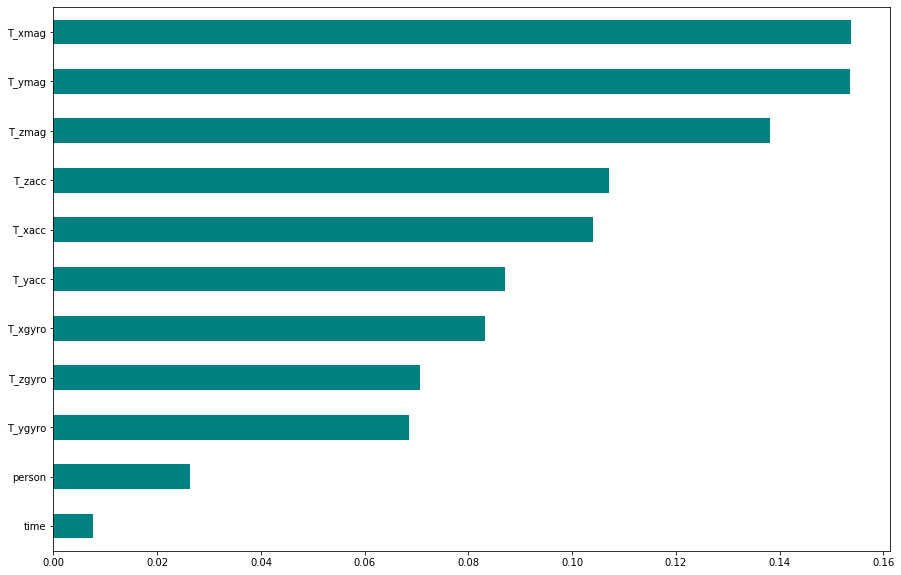

In [15]:
plot_features_importance(rf_torso, 'teal')

# Torso conclusion:
- Most features don't contribute to improving the torso models score
- Ranking of sensor importance for torso:
    -

# Train model on Arms

In [16]:
rf_arms = RandomForestClassifier()

In [17]:
y = arms['activity_number']

In [18]:
X = arms.drop('activity_number', axis=1)

In [19]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [20]:
rf_arms.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
rf_arms.score(X_test, y_test)

0.7631578947368421

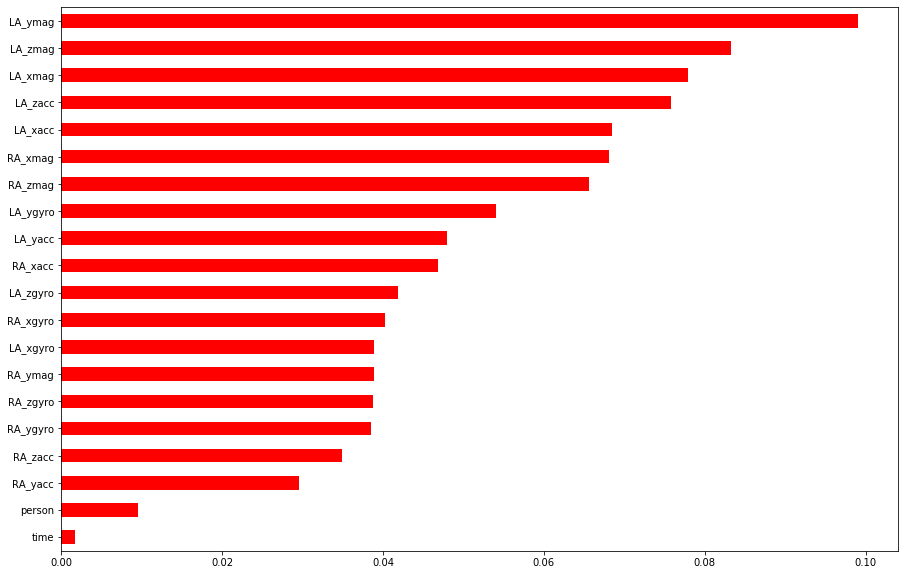

In [22]:
plot_features_importance(rf_arms, 'red')

# Train model on Legs

In [23]:
rf_legs = RandomForestClassifier()

In [24]:
y = legs['activity_number']

In [25]:
X = legs.drop('activity_number', axis=1)

In [26]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [27]:
rf_legs.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
rf_legs.score(X_test, y_test)

0.8052631578947368

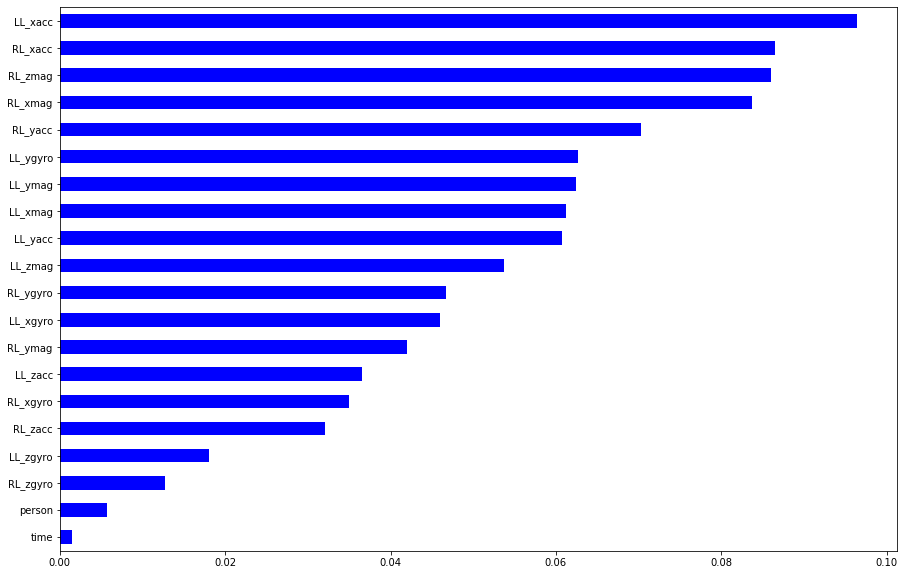

In [29]:
plot_features_importance(rf_legs, 'blue')